## Regresión Logística – Heart Disease Cleveland UCI

#Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [12]:
# cargar las librerias necesarias 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# librerias para la implementacion de modelo de ciencia de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## lectura de datos en python y variables de datos 

In [15]:
# Cargar el datase
data = pd.read_csv('C:\\Users\\DELL\\Desktop\\heart_cleveland_upload.csv')


In [17]:
# lectura de datos para el analisis exploratorio 
print(data.describe(include='all'))

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

In [19]:
# descripcion de los datos 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


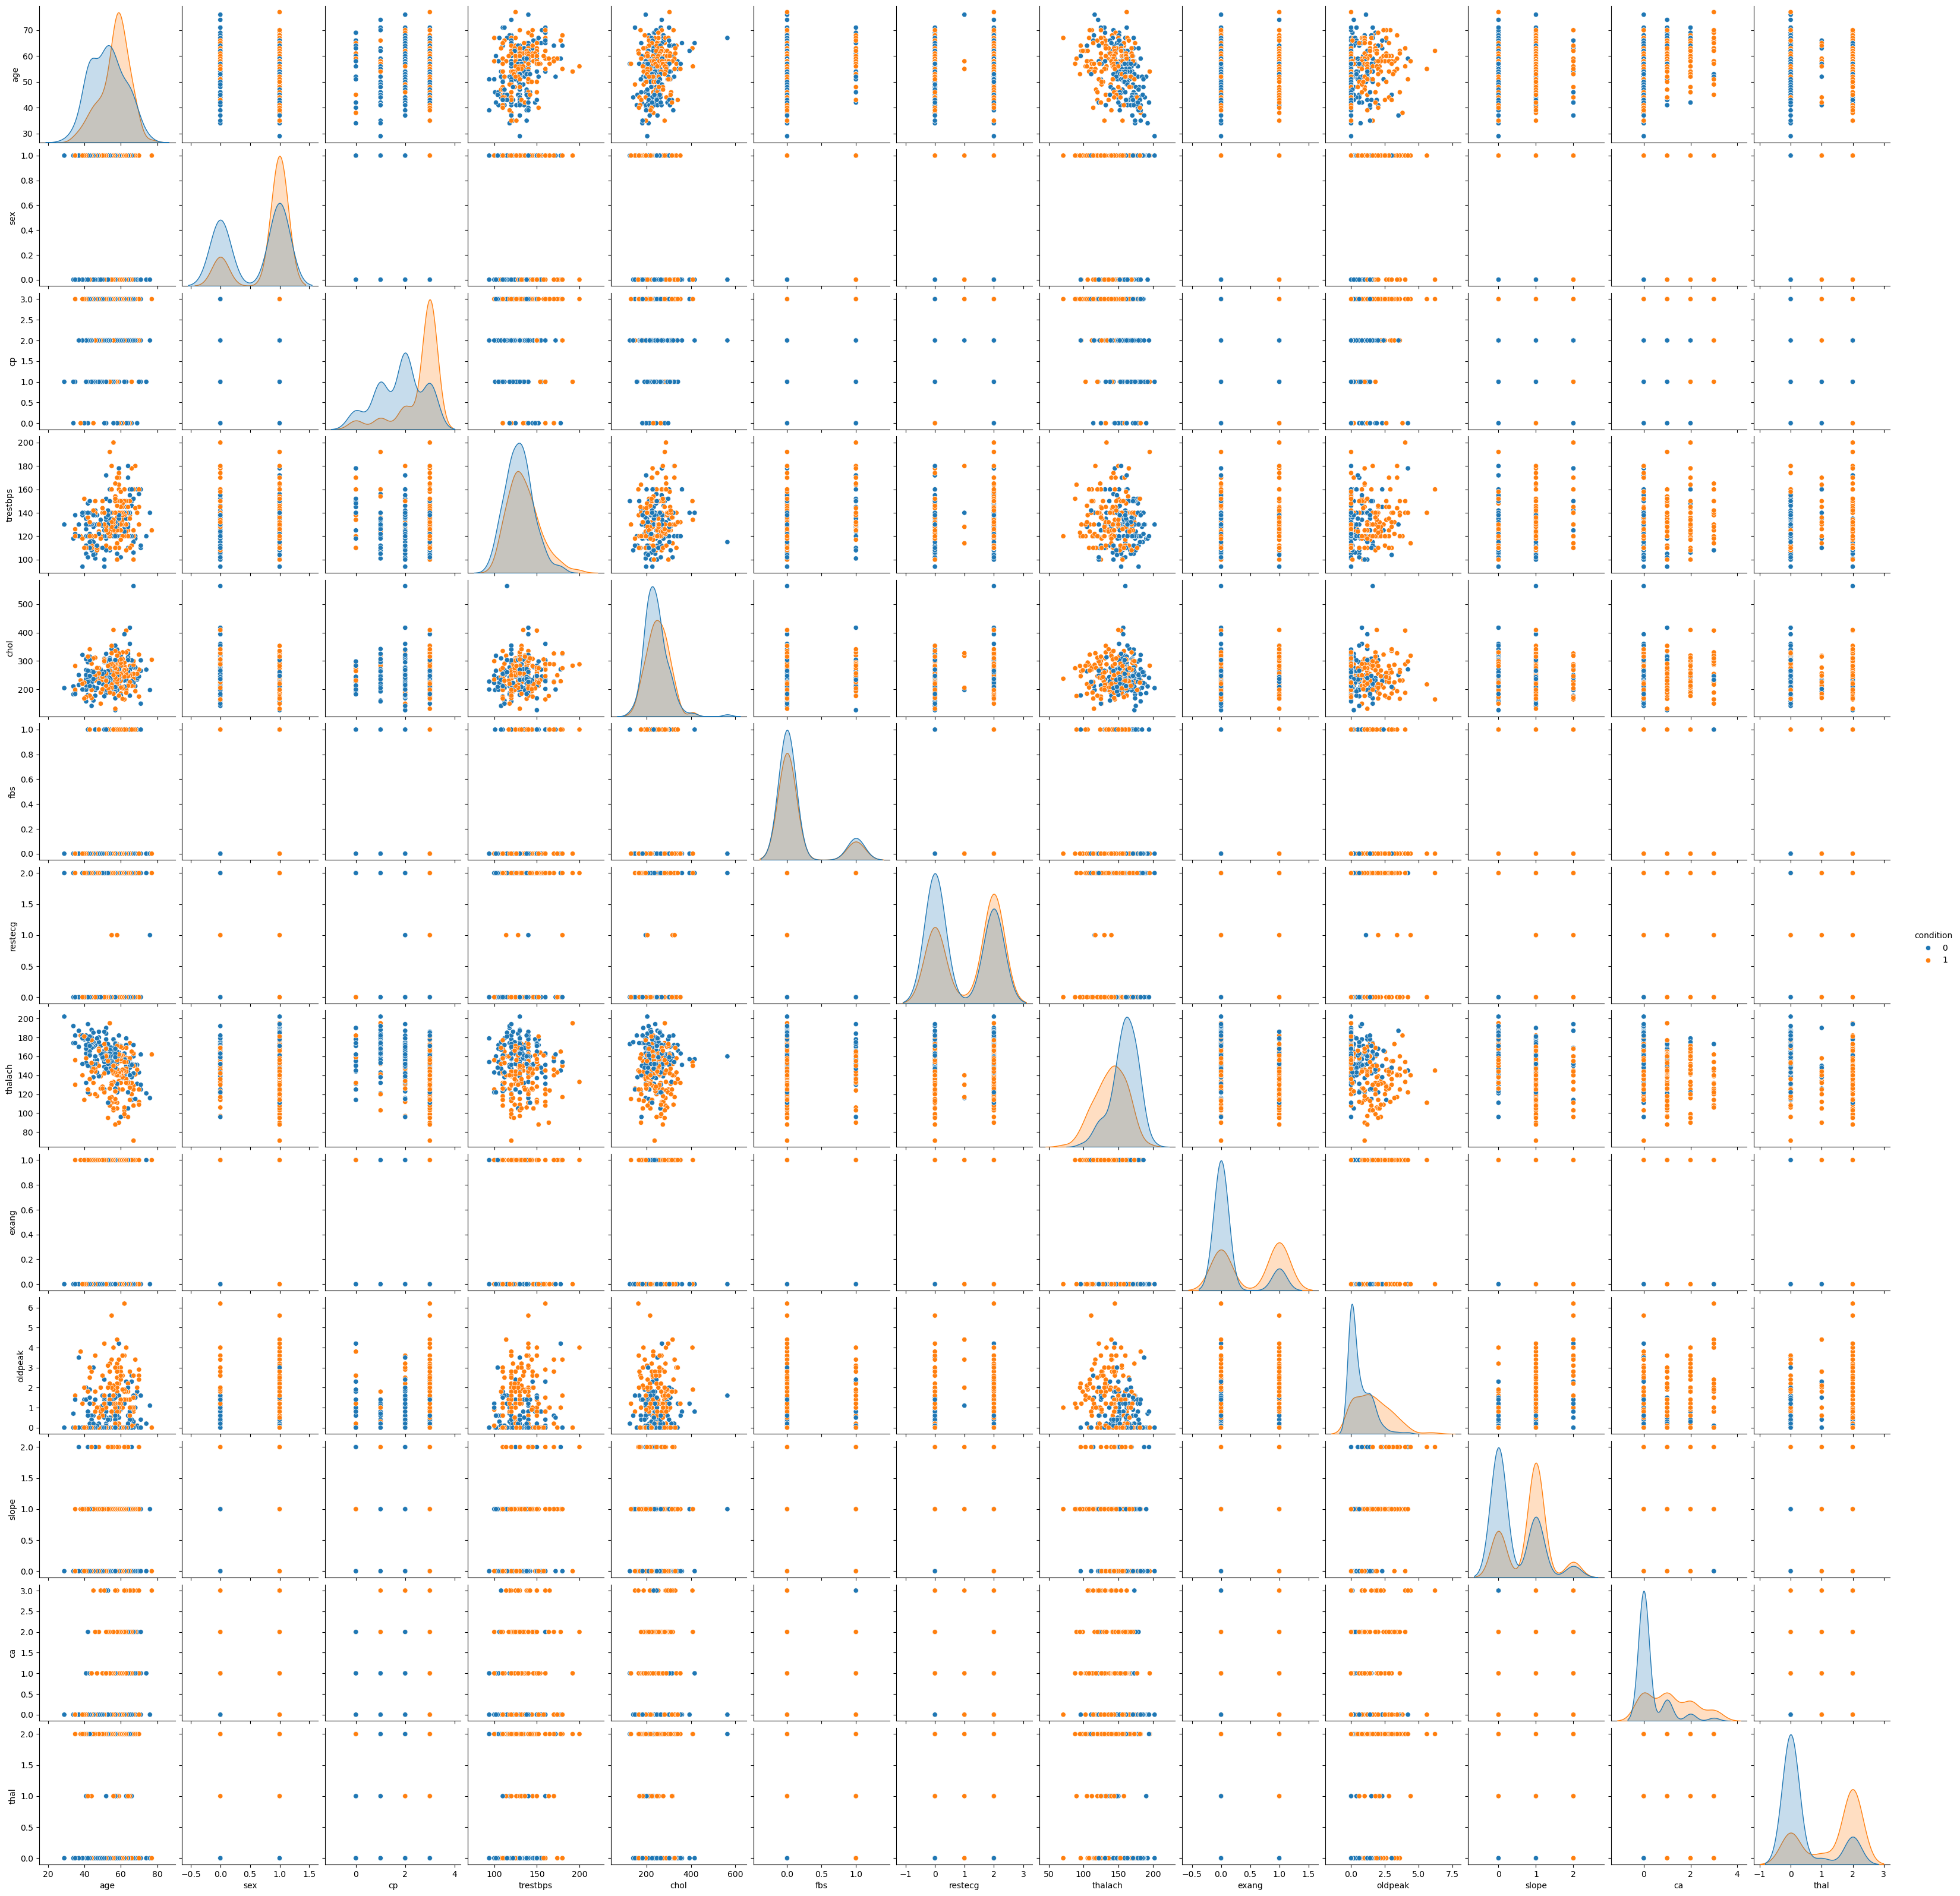

In [21]:
# Visualizar las distribuciones de las características
sns.pairplot(data, hue='condition')
plt.show()

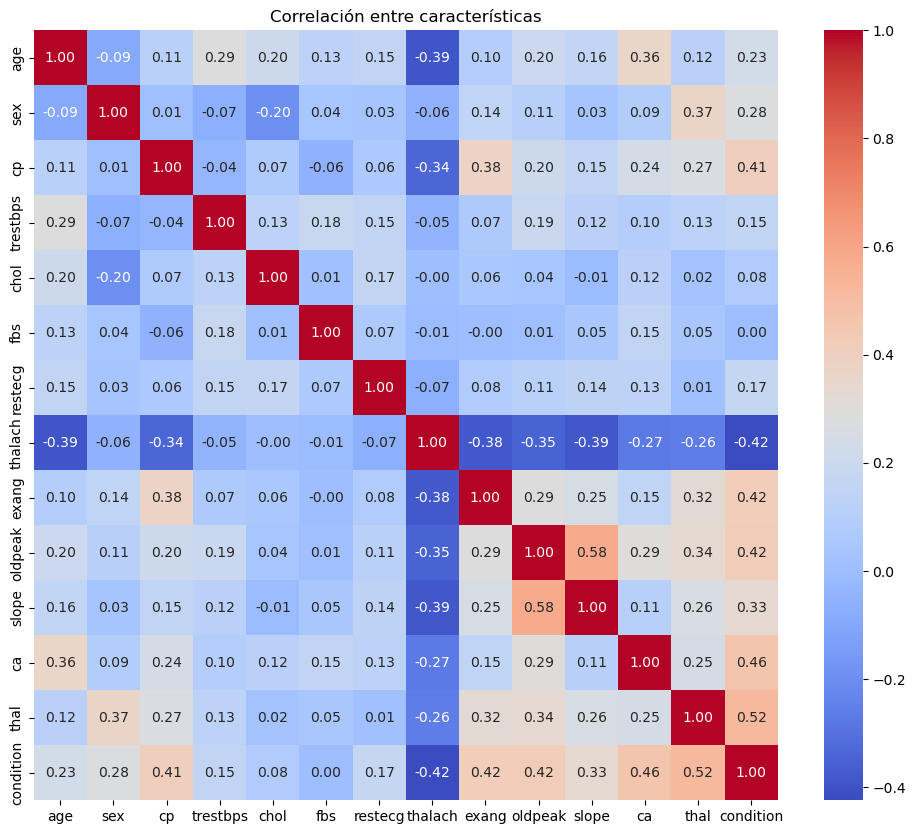

In [22]:
# Correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlación entre características')
plt.show()

## Preprocesamiento de Datos

In [26]:
# Comprobarmos valores faltantes
print(data.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [28]:
# los valores faltantes, puedes optar por eliminarlos o imputarlos
data.dropna(inplace=True)

In [30]:
# Transformar columnas si es necesario
data['exang'] = data['exang'].astype('category')

In [32]:
# Normalización/estandarización de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'chol', 'thalach', 'oldpeak'] 
data[numerical_features] = scaler.fit_transform(data[numerical_features])

## Selección de Características

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

X = data.drop('condition', axis=1)
y = data['condition']


In [37]:
# Selección de las mejores características
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
print(scores.sort_values(by='Score', ascending=False))

               Score
thal      109.629171
ca         80.577866
oldpeak    64.677208
thalach    64.589855
exang      63.680253
cp         59.241915
slope      36.804300
sex        24.798347
age        16.038097
restecg     8.394987
trestbps    7.117646
chol        1.913800
fbs         0.002959


## División del Dataset

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del Modelo

In [49]:
X = data.drop('condition', axis=1)
y = data['condition']

In [51]:
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [55]:
# Definir el modelo
model = LogisticRegression(max_iter=1000)

In [59]:
# Ajuste de hiperparámetros con penalización L1 usando el solver 'liblinear'
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],  # Incluir l1 y l2
    'solver': ['liblinear']  # Usar liblinear para l1
}

In [61]:
# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [63]:

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [65]:
# Ver el mejor conjunto de parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

Mejores parámetros encontrados: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


## Evaluación del Desempeño

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)

In [70]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



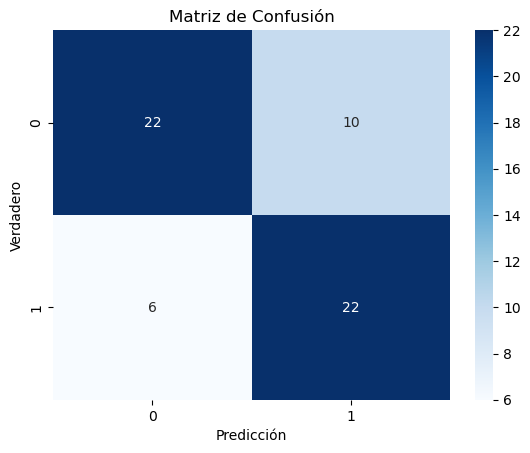

In [72]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

## Visualización de Resultados

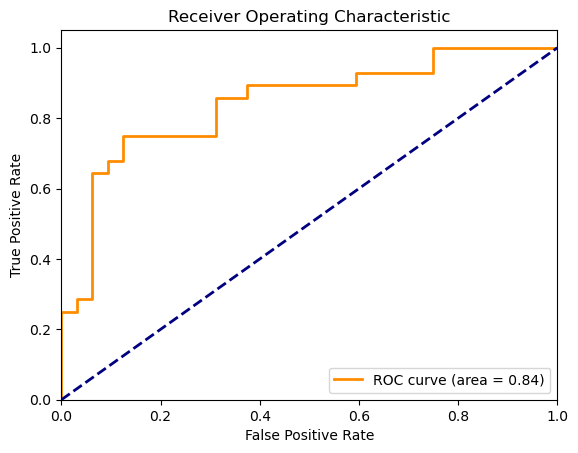

In [75]:
# Gráfico ROC
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()